In [2]:
import os
import pickle
import torch
import nb_utils
from lightning_data_modules import HaarDecomposedDataset, ImageDatasets, PairedDataset, SyntheticDataset, SyntheticPairedDataset, Synthetic1DConditionalDataset, SyntheticTimeSeries, SRDataset, SRFLOWDataset, KSphereDataset, MammothDataset, LineDataset, GanDataset #needed for datamodule registration
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.KSphereGroundTruthModel import KSphereGroundTruthModel
from models.ksphere_gt import KSphereGT
from models.ddpm import DDPM
from models.fcn import FCN
import pickle
import sde_lib
from dim_reduction import get_manifold_dimension
from configs.utils import read_config
from plot_utils import plot_spectrum

In [ ]:
for std in [0.0, 0.25, 0.5, 0.75, 1]:
    config = read_config(f'logs/ksphere/robustness/std={std}/checkpoints/best/last.ckpt')
    get_manifold_dimension(config)

Aggregation mode: first


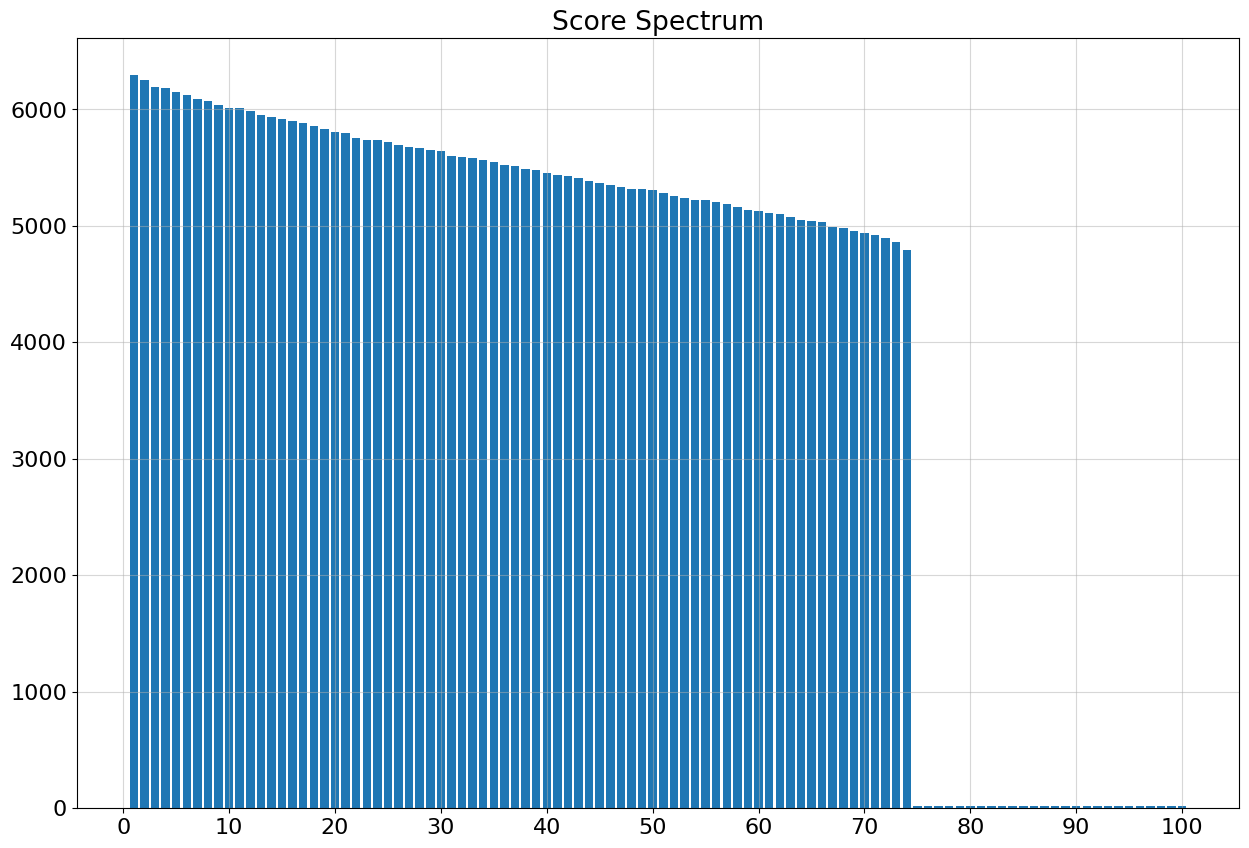

In [8]:
std=0.0
plot_spectrum(f'logs/ksphere/robustness/std={std}/svd/svd.pkl')